In [1]:
import netCDF4
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import datetime# as dt
import urllib
import time
import calendar
import csv
import pandas as pd
import pickle

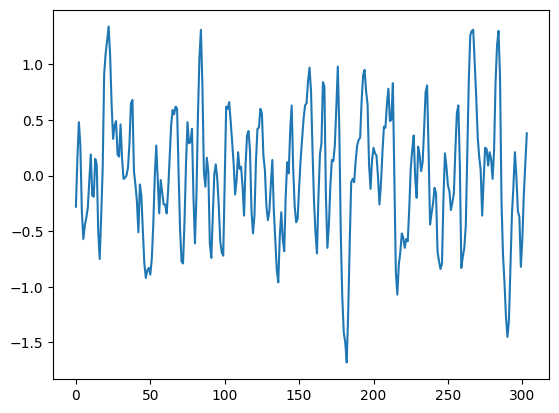

In [2]:
loaded = np.load( '../data/data_example_xyz.npz', allow_pickle = True)

x =loaded['x']
y =loaded['y']
z =loaded['z']
t =loaded['sample_time_cut']

plt.figure()
plt.plot(x[2000:3000])

In [3]:
# path = '../data/data_example_xyz.csv'
# df = pd.read_csv(path, header=0)

# t = np.array(df['sample_time_cut'])
# x = np.array(df['x'])
# y = np.array(df['y'])
# z = np.array(df['z'])

In [4]:
z

array([-0.14,  0.84,  0.5 , ..., -0.81, -1.22, -0.64],
      shape=(2304,), dtype=float32)

In [5]:
Nfft = len(z)
Nfft

2304

In [35]:
# Hann taper
taper=.5*(1 - np.cos(2*np.pi*(np.arange(0,Nfft)/(Nfft-1))))

# apply taper
z_taper= z*taper

np.where(z_taper < -4)
ind =np.where(z_taper < -4)
z_taper[ind] = 0.#None

dk = 1/len(t)

dt = np.mean(np.diff(t))
dt = 0.78125

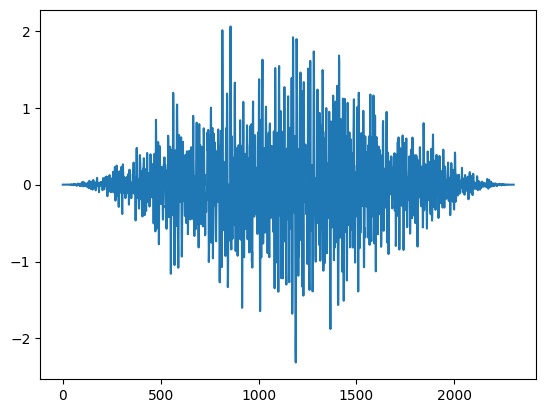

In [36]:
plt.figure()
plt.plot(z_taper)

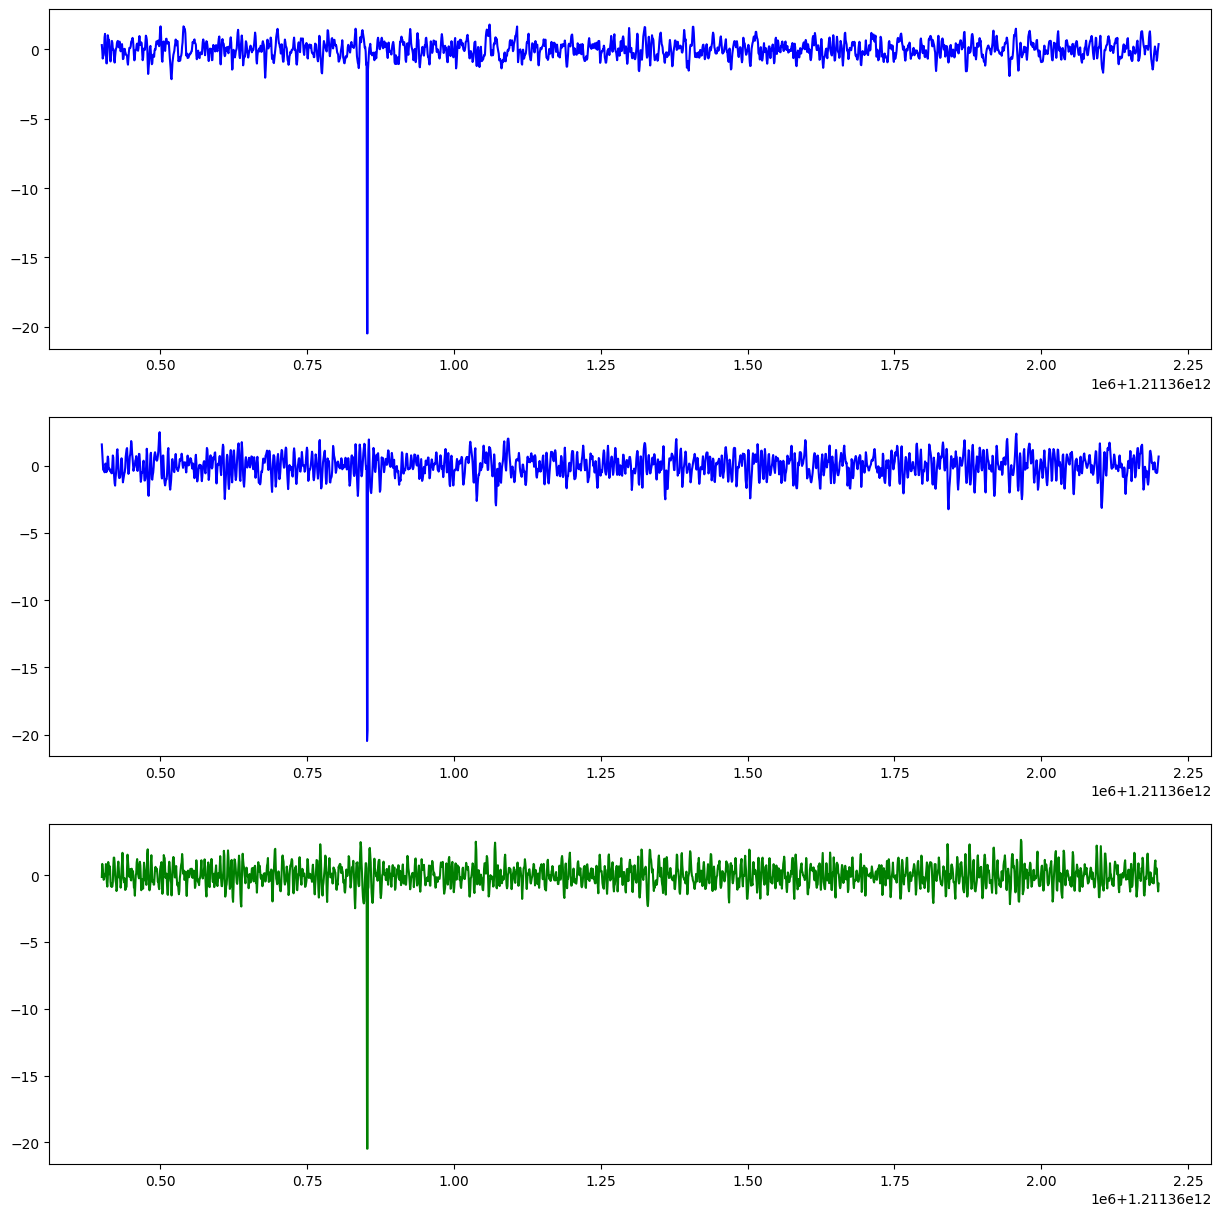

In [37]:
# Specify figure size
fig = plt.figure(figsize=(15,15))

# Create 3 stacked subplots for three Directional Displacement Parameters (xyz)
plt_x = plt.subplot(3,1,1)
plt_x.plot(t,x,'b')
plt_y = plt.subplot(3,1,2)
plt_y.plot(t,y,'b')
plt_z = plt.subplot(3,1,3)
plt_z.plot(t,z,'g')


In [38]:
def compute_1d_spectrum(eta,dx):
    etak = fft(eta)
    Nfft = len(eta)
    k = np.fft.fftfreq(Nfft)/(dx)
    # compute spectrum
    PSD=np.abs(etak)**2/Nfft**2/dk # power spectral density ( m^2 / cpm )
    # keep only positive frequencies
    Npos=int(Nfft/2)
    kp = k[0:Npos]
    PSD=2*PSD[0:Npos] # times two to account for the variance of the ambigous negative frequencies
    return PSD,kp  # smoothed spectrum PSDs at center wavenumber ksc

In [39]:
np.shape(PSD), np.shape(z_taper)
dt

0.78125

In [40]:
[PSD,k]=compute_1d_spectrum(z_taper,dt)

In [41]:
len(z_taper)/2

1152.0

In [42]:
len(PSD)

1152

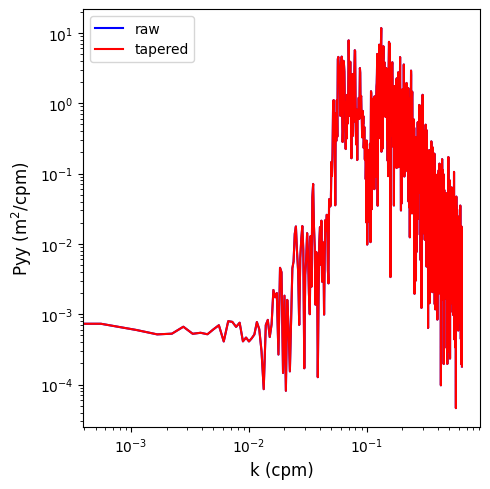

In [43]:
# compare the spectra
plt.figure(figsize = (5, 5))
plt.loglog(k, PSD, 'b',label='raw')
plt.loglog(k, PSD, 'r',label='tapered')
plt.xlabel('k (cpm)',fontsize=12)
plt.ylabel('Pyy (m$^2$/cpm)',fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()